<a href="https://colab.research.google.com/github/disharanganath21/Lung-Cancer-Recurrence-Prediction/blob/main/upi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing modules


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [155]:
#data collection
#pandas for data manipulation
df=pd.read_csv('/content/drive/MyDrive/DATA.csv')

In [156]:
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28/01/24,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21/06/23,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [157]:
df.tail()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
642,T00026082,24/07/23,3:12:04 AM,6696dc2b-d48e-4880-8845-e65aa1df8d7d,4ab8bcd6-295c-4ae5-b4f5-2f3182a969c8,a1f5d01e-a69f-404d-b2ce-6ff4bb17de62,Bill Payment,Gamma Bank,Hyderabad,Assam,34.163.43.64,Pending,iOS,4,Travel bookings,In-store,14.00,25,28.27,0
643,T00017272,05/07/23,6:21:18 AM,f2af26ef-0e08-42f8-b6ed-eaab786f5bf6,6cd4af1c-6564-47eb-bcf9-cd44c45c0f2b,36d089dd-b74d-4157-ba29-823b85368169,Purchase,Other,Bangalore,Tripura,129.125.172.104,Pending,Windows,10,More Services,Mobile,-33.38,28,26.26,0
644,T00048923,16/04/23,8:32:41 AM,c6ce37eb-332d-4e4f-995f-fba48d4dedb9,690bd64f-5c83-41b8-873a-57c9bc6bb132,668b172d-b1ab-438b-9650-358bc8d48494,Bill Payment,Other,Mumbai,Arunachal Pradesh,27.48.57.181,Failed,Android,1,More Services,Online,-44.37,19,6.02,0
645,T00022497,28/10/23,9:33:42 AM,b8ac3703-52dc-4372-b59b-4f9b51a5a855,48b40bc8-a730-4420-9702-2beecca286f0,e18b7076-1718-475e-81de-9ff2c392d194,Bank Transfer,Bank of Data,Vijayawada,Madhya Pradesh,206.122.250.79,Failed,Windows,2,Investment,In-store,-57.29,12,17.12,0
646,T00032445,11/04/24,10:48:14 AM,9d40b579-b71e-4d16-8917-fce4ecdf9183,108391b3-9545-49f8-be38-e356e64e8912,9a6daf2d-c57f-4dbd-ae2b-86d49a9d60e3,Bank Transfer,Dummy Bank,Ichalkaranji,Assam,165.92.164.116,Completed,iOS,2,Brand Vouchers and OTT,In-store,-11.94,26,50.60,0


In [158]:
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

In [160]:
df.describe()

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
count,647.000000,647.000000,647.000000,647.000000,647.000000
mean,3.564142,5.014668,15.717156,128.839753,0.239567
std,6.454543,56.375914,8.218122,364.995747,0.427150
min,0.000000,-99.470000,1.000000,0.120000,0.000000
25%,1.000000,-42.355000,8.500000,17.155000,0.000000
50%,2.000000,8.380000,16.000000,35.000000,0.000000
75%,3.000000,52.290000,23.000000,74.770000,0.000000
max,50.000000,99.450000,29.000000,4883.620000,1.000000


Data preparation
-duplicate value
-missing value
-unique value
-removing unique values


In [161]:
#duplicate
df.duplicated().sum()

np.int64(0)

In [162]:
df.isnull().sum()

,0
Transaction_ID,0
Date,0
Time,0
Merchant_ID,0
Customer_ID,0
Device_ID,0
Transaction_Type,0
Payment_Gateway,0
Transaction_City,0
Transaction_State,0


In [163]:
df.shape

(647, 20)

In [164]:
#unique values
df.nunique()

,0
Transaction_ID,647
Date,302
Time,641
Merchant_ID,647
Customer_ID,647
Device_ID,647
Transaction_Type,7
Payment_Gateway,9
Transaction_City,281
Transaction_State,28


In [165]:
df.drop(['Device_ID'],axis=1,inplace=True)
df.drop(['Merchant_ID'],axis=1,inplace=True)
df.drop(['Customer_ID'],axis=1,inplace=True)
df.drop(['IP_Address'],axis=1,inplace=True)


In [166]:
df.shape

(647, 16)

Data cleaning and Feature Engineering



In [167]:
import datetime as dt

In [168]:
df['year']=pd.to_datetime(df['Date']).dt.year
df['month']=pd.to_datetime(df['Date']).dt.month


/tmp/ipython-input-686599689.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['year']=pd.to_datetime(df['Date']).dt.year
/tmp/ipython-input-686599689.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month']=pd.to_datetime(df['Date']).dt.month


In [169]:
df['year']

,year
0,2023
1,2023
2,2023
3,2024
4,2023
...,...
642,2023
643,2023
644,2023
645,2023


In [170]:
df.shape

(647, 18)

In [171]:
df.head(2)

,Transaction_ID,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,year,month
0,T00022452,20/04/23,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,4
1,T00032233,08/08/23,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,8


In [172]:
df['month'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [173]:
df['month']

,month
0,4
1,8
2,6
3,1
4,6
...,...
642,7
643,5
644,4
645,10


In [174]:
month={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [175]:
df['months']=df['month'].map(month)

In [176]:
df.drop(['Date'],axis=1,inplace=True)


In [177]:
df['fraud'].value_counts()

,count
fraud,
0,492
1,155


<Axes: xlabel='fraud', ylabel='count'>

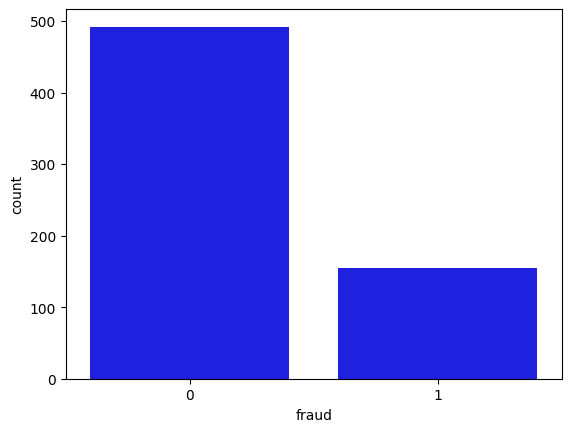

In [178]:
sns.countplot(data=df,x='fraud',color='blue')

In [179]:
#create seperate datasets for normal and fraud transactions
fraud=df[df['fraud']==1]

In [180]:
normal=df[df['fraud']==0]

In [181]:
#analysing fraud dataset
fraud.head()

,Transaction_ID,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,year,month,months
0,T00022452,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,4,Apr
1,T00032233,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,8,Aug
2,T00037364,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,6,Jun
3,T00015924,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,1,Jan
4,T00021805,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,6,Jun


In [182]:
fraud.dtypes

,0
Transaction_ID,object
Time,object
Transaction_Type,object
Payment_Gateway,object
Transaction_City,object
Transaction_State,object
Transaction_Status,object
Device_OS,object
Transaction_Frequency,int64
Merchant_Category,object


In [183]:
numeric_col=fraud.select_dtypes(include=np.number)

In [184]:
cat_col=fraud.select_dtypes(include='object')

In [185]:
numeric_col.columns

Index(['Transaction_Frequency', 'Transaction_Amount_Deviation',
       'Days_Since_Last_Transaction', 'amount', 'fraud', 'year', 'month'],
      dtype='object')

In [186]:
numeric_col.corr()

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,year,month
Transaction_Frequency,1.000000,0.112079,0.048399,-0.047628,NaN,-0.068477,0.074015
Transaction_Amount_Deviation,0.112079,1.000000,-0.057579,-0.034097,NaN,-0.005956,-0.002803
Days_Since_Last_Transaction,0.048399,-0.057579,1.000000,0.078918,NaN,-0.003681,-0.004436
amount,-0.047628,-0.034097,0.078918,1.000000,NaN,0.022114,0.008445
fraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,-0.068477,-0.005956,-0.003681,0.022114,NaN,1.000000,-0.516547
month,0.074015,-0.002803,-0.004436,0.008445,NaN,-0.516547,1.000000


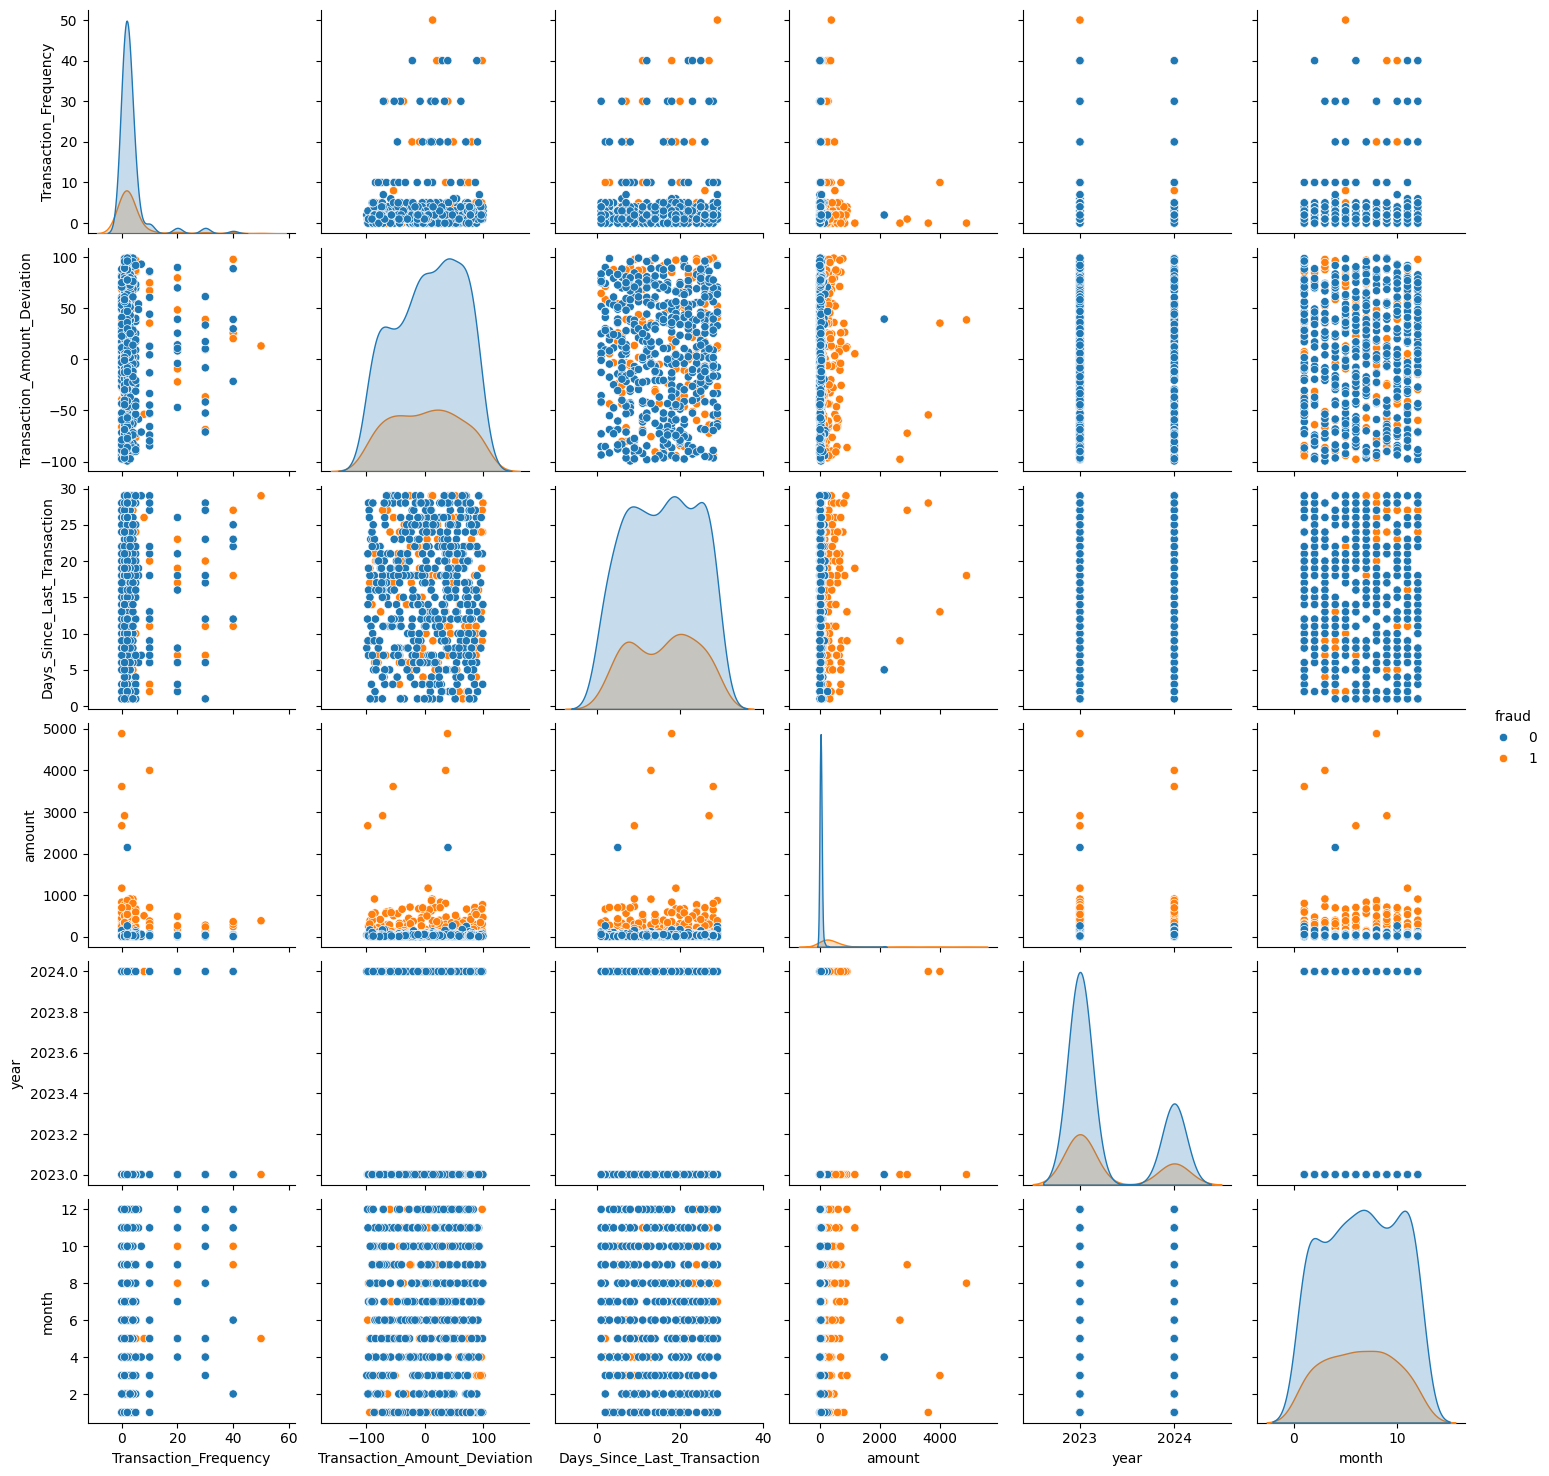

In [187]:
sns.pairplot(data=df,hue='fraud')

In [188]:
df.head()

,Transaction_ID,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,year,month,months
0,T00022452,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,4,Apr
1,T00032233,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,8,Aug
2,T00037364,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,6,Jun
3,T00015924,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,1,Jan
4,T00021805,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,6,Jun


In [189]:
columns_to_Drop=['Days_Since_Last_Transaction','Transaction_Frequency','month','Transaction_Amount_Deviation','Transaction_Status','Time','Device_OS','Transaction_Channel','month','Transaction_City']

In [194]:
df.shape

(647, 8)

In [191]:
df.drop(columns=columns_to_Drop,axis=1,inplace=True)

In [193]:
df.drop(columns='Transaction_ID',axis=1,inplace=True)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   647 non-null    object 
 1   Payment_Gateway    647 non-null    object 
 2   Transaction_State  647 non-null    object 
 3   Merchant_Category  647 non-null    object 
 4   amount             647 non-null    float64
 5   fraud              647 non-null    int64  
 6   year               647 non-null    int32  
 7   months             647 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 38.0+ KB


In [196]:
df.shape

(647, 8)

In [197]:
data=df.copy()

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   647 non-null    object 
 1   Payment_Gateway    647 non-null    object 
 2   Transaction_State  647 non-null    object 
 3   Merchant_Category  647 non-null    object 
 4   amount             647 non-null    float64
 5   fraud              647 non-null    int64  
 6   year               647 non-null    int32  
 7   months             647 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 38.0+ KB


In [199]:
data['year']=data['year'].astype('object')

In [200]:
cat_column=data.select_dtypes(include=['object']).columns

In [201]:
cat_column

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_State',
       'Merchant_Category', 'year', 'months'],
      dtype='object')

In [202]:
from sklearn.preprocessing import LabelEncoder

In [203]:
col=['year','Months']
label_encoder=LabelEncoder()
for col in cat_column:
  data[col]=label_encoder.fit_transform(data[col])

In [204]:
non_col=['Transaction_Type', 'Payment_Gateway', 'Transaction_State', 'Merchant_Category']
data=pd.get_dummies(data,columns=non_col,drop_first=True)
data=data.astype(int)

In [206]:
data.columns

Index(['amount', 'fraud', 'year', 'months', 'Transaction_Type_1',
       'Transaction_Type_2', 'Transaction_Type_3', 'Transaction_Type_4',
       'Transaction_Type_5', 'Transaction_Type_6', 'Payment_Gateway_1',
       'Payment_Gateway_2', 'Payment_Gateway_3', 'Payment_Gateway_4',
       'Payment_Gateway_5', 'Payment_Gateway_6', 'Payment_Gateway_7',
       'Payment_Gateway_8', 'Transaction_State_1', 'Transaction_State_2',
       'Transaction_State_3', 'Transaction_State_4', 'Transaction_State_5',
       'Transaction_State_6', 'Transaction_State_7', 'Transaction_State_8',
       'Transaction_State_9', 'Transaction_State_10', 'Transaction_State_11',
       'Transaction_State_12', 'Transaction_State_13', 'Transaction_State_14',
       'Transaction_State_15', 'Transaction_State_16', 'Transaction_State_17',
       'Transaction_State_18', 'Transaction_State_19', 'Transaction_State_20',
       'Transaction_State_21', 'Transaction_State_22', 'Transaction_State_23',
       'Transaction_State_24'

In [207]:
data.head()
data.tail()

,amount,fraud,year,months,Transaction_Type_1,Transaction_Type_2,Transaction_Type_3,Transaction_Type_4,Transaction_Type_5,Transaction_Type_6,...,Transaction_State_27,Merchant_Category_1,Merchant_Category_2,Merchant_Category_3,Merchant_Category_4,Merchant_Category_5,Merchant_Category_6,Merchant_Category_7,Merchant_Category_8,Merchant_Category_9
642,28,0,0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
643,26,0,0,8,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
644,6,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
645,17,0,0,10,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
646,50,0,1,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
data.shape

(647, 54)

In [209]:
import pandas as pd
from sklearn.model_selection import train_test_split
#split data into fraud and non fraud
fraud_data=data[data['fraud']==1]
non_fraud_data=data[data['fraud']==0]
sampled_fraud_data=fraud_data.sample(frac=0.5,random_state=42)
sampled_non_fraud_data=non_fraud_data.sample(frac=0.5,random_state=42)
data=pd.concat([sampled_fraud_data,sampled_non_fraud_data])

In [210]:
#perform scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def preprocess_data(X):
  scaler=StandardScaler()
  X_scaled=scaler.fit_transform(X)
  return X_scaled
x=data.drop('fraud',axis=1)
y=data['fraud']
X_scaled=preprocess_data(x)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(259, 53)
(65, 53)
(259,)
(65,)


In [215]:
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [222]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
def evaluate(model,X_test,y_test):
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  roc_auc=roc_auc_score(y_test,y_pred)
  return{
      'model':type(model).__name__,
      'accuracy':accuracy,
      'precision':precision,
      'recall':recall,
      'f1':f1,
      'roc_auc':roc_auc
  }
model={
       "Decision tree":DecisionTreeClassifier(),
       "Random forest":RandomForestClassifier()
  }
results=[]
for model_name,model in model.items():
    model.fit(X_train,y_train)
    results.append(evaluate(model,X_test,y_test))
result_df=pd.DataFrame(results)
print(result_df)

                    model  accuracy  precision  recall        f1   roc_auc
0  DecisionTreeClassifier  0.892308        0.8  0.7500  0.774194  0.844388
1  RandomForestClassifier  0.923077        1.0  0.6875  0.814815  0.843750


In [223]:
from imblearn.over_sampling import SMOTE
x_res,y_res=SMOTE().fit_resample(x,y)
print(x_res.shape)
print(y_res.shape)

(492, 53)
(492,)


In [224]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
def evaluate(model,X_test,y_test):
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  roc_auc=roc_auc_score(y_test,y_pred)
  return{
      'model':type(model).__name__,
      'accuracy':accuracy,
      'precision':precision,
      'recall':recall,
      'f1':f1,
      'roc_auc':roc_auc
  }
model={
       "Decision tree":DecisionTreeClassifier(),
       "Random forest":RandomForestClassifier()
  }
results=[]
for model_name,model in model.items():
    model.fit(X_train,y_train)
    results.append(evaluate(model,X_test,y_test))
result_df=pd.DataFrame(results)
print(result_df)

                    model  accuracy  precision  recall        f1   roc_auc
0  DecisionTreeClassifier  0.892308        0.8  0.7500  0.774194  0.844388
1  RandomForestClassifier  0.953846        1.0  0.8125  0.896552  0.906250
